In [ ]:
!pip3 install numdifftools

In [1]:
import numpy as np
import numdifftools as nd
from scipy import optimize
import matplotlib.pyplot as plt
import time

# The Ellipsoid Function

In [2]:
def f1(x, alpha=1000):  # x is list
    """The Ellipsoid function"""
    result = 0
    for i in range(1, len(x) + 1):
        exponent = (i - 1) / (len(x) - 1)
        result += (alpha ** exponent) * x[i - 1] ** 2
    return result


def f1_gradient(x, alpha=1000):
    """Gradient of the Ellipsoid function"""
    return nd.Gradient(f1)(x, alpha)


def f1_hessian(x, alpha=1000):
    """Gradient of the Ellipsoid function"""
    return nd.Hessian(f1)(x, alpha)


In [3]:
f1_hessian([1, 2, 3])

array([[   2.       ,    0.       ,    0.       ],
       [   0.       ,   63.2455532,    0.       ],
       [   0.       ,    0.       , 2000.       ]])

In [12]:
f1([1, 1])

0.0
1.001
0.0010993954433008424
2.0


In [ ]:
h, p = 0.1, np.array([1, 1, 1])
x = np.array([1, 1, 1])
#print(f1(x+p)-(f1(x)+np.matmul(f1_gradient(x+h*p).T,p)))


h_values = np.linspace(0, 1, 9)
#for i in range(len(h_values)):
#    print(f1(x+p)-(f1(x)+np.matmul(f1_gradient(x+h_values[i]*p).T,p)),h_values[i])

In [ ]:

for i in np.linspace(1, 0.0001, 10):
    p = np.array([i, i, i])
    print((f1(x + p) - f1(x) - np.dot(f1_gradient(x), p)) / np.linalg.norm(p))

596.1850380423209
529.9488803158188
463.7127225893166
397.4765648628152
331.24040713631325
265.0042494098114
198.76809168330936
132.5319339568076
66.29577623030542
0.05961850260744255


# The Rosenbrock Banana Function

In [ ]:
def f2(x):  # x list with length 2
    """The Rosenbrock Banana Function"""
    return ((1 - x[0]) ** 2) + (100 * (x[1] - x[0] ** 2) ** 2)


def f2_gradient(x):  # x list with length 2
    """Gradient of the Rosenbrock Banana Function"""
    return nd.Gradient(f2)(x)


def f2_hessian(x):
    """Hessian Matrix of the Rosenbrock Banana Function"""
    return nd.Hessian(f2)([x[0], x[1]])


In [ ]:
print(f2_gradient([1, 1]))  #equals 0, hence minimizer
print(np.linalg.eig(f2_hessian([1, 1])))  #eigenvalues of hessian are positive, hence minimizer

[0. 0.]
(array([1.00160064e+03, 3.99360767e-01]), array([[ 0.89478425,  0.44649877],
       [-0.44649877,  0.89478425]]))


In [ ]:
x = np.array([2, 3])
for i in np.linspace(1, 0.0001, 10):
    p = np.array([i, i])
    print((f2(x + p) - f2(x) - np.dot(f2_gradient(x), p)) / np.linalg.norm(p))

1273.4993129169711
1076.9240915645414
895.4774053857511
728.577448067543
575.6424132968609
436.0904947606462
309.3398861458427
194.80878113939042
91.9153734282368
0.07785670025182911


In [ ]:
x = np.array([1, 2])
for i in np.linspace(0.0001, 0.00001, 10):
    p = np.array([i, i])
    print((f2_gradient(x + p)[0] - f2_gradient(x)[0] - np.dot(f2_hessian(x)[0][:], p)) / np.linalg.norm(p))

0.05657137610207417
0.050913979519815675
0.04525664542863541
0.03959936328704826
0.033942142322279635
0.028284982261504964
0.022627867486432782
0.01697082452523078
0.011313826447820308
0.005656863205486963


## Benchmark

# The Log-Ellipsoid Function

In [ ]:
def f3(x, alpha=1000, epsilon=10 ** (-4)):  # x is list
    """The Log-Ellipsoid Function"""
    return np.log(epsilon + f1(x, alpha))


def f3_gradient(x, alpha=1000, epsilon=10 ** (-4)):
    """Gradient of the Log-Ellipsoid Function"""
    return nd.Gradient(f3)(x, alpha, epsilon)


def f3_hessian(x, alpha, epsilon=10 ** (-4)):
    """Gradient of the Log-Ellipsoid Function"""
    return nd.Hessian(f3)(x, alpha, epsilon)

In [ ]:
x = np.array([1, 2, 3])
for i in np.linspace(1, 0.0001, 10):
    p = np.array([i, i, i])
    print((f3(x + p) - f3(x) - np.dot(f3_gradient(x), p)) / np.linalg.norm(p))

-0.05326474165545317
-0.048286103761021666
-0.04310959438241094
-0.03772171990611747
-0.03210764847564421
-0.02625103277605129
-0.02013380306365662
-0.013735924321231807
-0.007035109914809797
-6.482185438334112e-06


## Benchmark

# The Attractive-Sector Function

In [ ]:
def _h(x, q=10 ** 4):
    """Helper function for f4 """
    return np.log(1 + np.exp(q * x)) // q


def h(x, q=10 ** 4):
    """Helper function for f4"""
    return (np.log(1 + np.exp(-np.abs(q * x))) + np.maximum(0, q * x)) / q


def f4(x):
    """The Attractive-Sector Function"""
    result = 0
    d = len(x)
    for i in range(1, 1 + d):
        result += h(x[i - 1]) ** 2 + 100 * h(-x[i - 1]) ** 2
    return result


def f4_gradient(x):  # Works only for a small domain - x in [-0.05, 0.05]
    return nd.Gradient(f4)(x)


def f4_hessian(x):  # Works only for a very small domain
    return nd.Hessian(f4)(x)

In [80]:
f4([-0.5])

25.0

In [ ]:
x = np.array([0.05, 0.03, 0.02])
for i in np.linspace(1, 0.0001, 10):
    p = np.array([i, i, i])
    print((f4(x + p) - f4(x) - np.dot(f4_gradient(x), p)) / np.linalg.norm(p))

1.7320508075688774
1.5396199628479748
1.347189118127073
1.1547582734061703
0.9623274286852682
0.7698965839643657
0.5774657392434633
0.38503489452256123
0.19260404980165893
0.0001732050807560156


## Benchmark

# The Sum of Different Powers Function

In [14]:
def f5(x):  # x list
    """The Sum of Different Powers Function"""
    result = 0
    for i in range(1, len(x) + 1):
        exponent = 1 + ((i - 1) / (len(x) - 1))
        result += (x[i - 1] ** 2) ** exponent
    return result


def f5_gradient(x):
    return nd.Gradient(f5)(x)


def f5_hessian(x):  # Works only for a very small domain
    return nd.Hessian(f5)(x)


In [15]:
x = np.array([1, 2, 3])
for i in np.linspace(1, 0.0001, 10):
    p = np.array([i, i, i])
    print((f5(x + p) - f5(x) - np.dot(f5_gradient(x), p)) / np.linalg.norm(p))

43.30127018922202
37.64157479934459
32.20517236053076
26.987312444126662
21.983244621478644
17.18821846393288
12.597483542835757
8.206289429533214
4.009885695372325
0.0035219118418452788
0.0


In [ ]:
x = np.array([1, 2, 3])
for i in np.linspace(0.0001, 0.00001, 10):
    p = np.array([i, i, i])
    print((f5_gradient(x + p)[2] - f5_gradient(x)[2] - np.dot(f5_hessian(x)[:][2], p)) / np.linalg.norm(p))

0.002078484871516532
0.0018706353205714598
0.0016627855257770811
0.001454933390063774
0.0012470867680435644
0.0010392394505890502
0.000831390505892463
0.0006235451438790073
0.00041570053395762466
0.00020784908682305997


# Benchmark

In [ ]:
randnums = np.random.randint(-20, 20, size=(5, 2))
randnums

In [191]:
def test(f, x):
    iterations = []
    num_fun_eval = []
    num_jab_eval = []
    results = []
    convergence = []
    t = []

    if f == f2:
        minimum = [1, 1]
    else:
        minimum = [0, 0]

    def callback(b):
        convergence.append(np.linalg.norm(b - minimum))

    for i, num in enumerate(randnums):
        t1 = time.time_ns()
        if i == 0:
            output = optimize.minimize(f, num, method=x, callback=callback)
        else:
            output = optimize.minimize(f, num, method=x)
        t2 = time.time_ns()
        t.append(t2 - t1)

        iterations.append(output.get("nit"))
        num_fun_eval.append(output.get("nfev"))
        if output.get("njev") != None:
            num_jab_eval.append(output.get("njev"))
        else:
            num_jab_eval.append(0)
        results.append(output.get("x"))

    iterations_avg = sum(iterations) / len(iterations)
    num_fun_eval_avg = sum(num_fun_eval) / len(num_fun_eval)
    num_jab_eval_avg = sum(num_jab_eval) / len(num_jab_eval)
    results_avg = sum(results) / len(results)

    plt.plot(convergence)

    print("iteration avg:", iterations_avg)
    print("Number of evaluations of Function avg:", num_fun_eval)
    print("Number of evaluations of Jacobian avg:", num_jab_eval)
    print("Resutls avg:", results_avg)
    print("Time avg:", np.average(t))

## f1

iteration avg: 66.6
Number of evaluations of Function avg: [121, 129, 121, 128, 135]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [2.31877501e-05 5.42423175e-07]
Time avg: 4280288.4


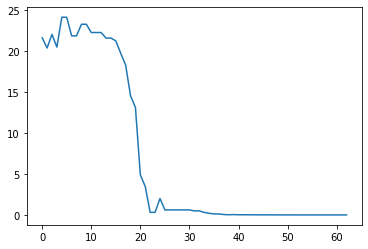

In [192]:
test(f1, 'Nelder-Mead')

iteration avg: 2.0
Number of evaluations of Function avg: [38, 38, 38, 38, 38]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [6.89489498e-13 8.34887715e-15]
Time avg: 1401099.0


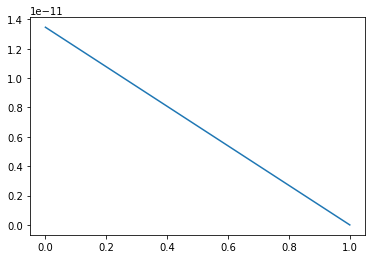

In [193]:
test(f1, 'Powell')

iteration avg: 5.8
Number of evaluations of Function avg: [36, 32, 28, 32, 32]
Number of evaluations of Jacobian avg: [9, 8, 7, 8, 8]
Resutls avg: [-8.59143706e-09 -7.98330319e-09]
Time avg: 1302399.4


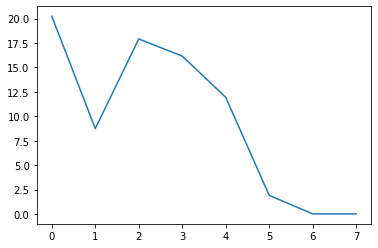

In [194]:
test(f1, 'BFGS')

## f2

iteration avg: 131.8
Number of evaluations of Function avg: [322, 184, 172, 336, 187]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [1.00001174 1.0000245 ]
Time avg: 7884456.6


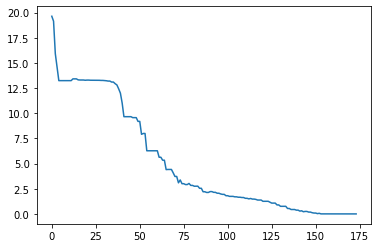

In [195]:
test(f2, 'Nelder-Mead')

iteration avg: 23.4
Number of evaluations of Function avg: [613, 549, 410, 1123, 731]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [1. 1.]
Time avg: 12140020.8


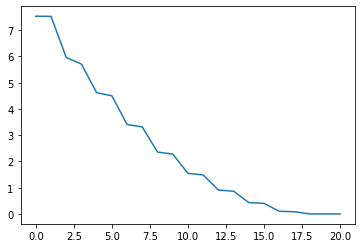

In [196]:
test(f2, 'Powell')

iteration avg: 81.0
Number of evaluations of Function avg: [688, 260, 316, 652, 200]
Number of evaluations of Jacobian avg: [172, 65, 79, 163, 50]
Resutls avg: [0.99999552 0.99999102]
Time avg: 12722804.4


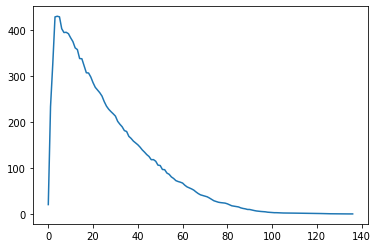

In [197]:
test(f2, 'BFGS')

## f3

iteration avg: 67.6
Number of evaluations of Function avg: [121, 133, 123, 128, 138]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [ 1.21585256e-05 -8.27335266e-07]
Time avg: 4367975.0


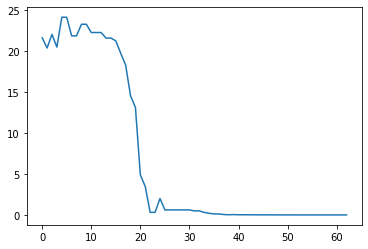

In [198]:
test(f3, 'Nelder-Mead')

iteration avg: 3.4
Number of evaluations of Function avg: [91, 95, 130, 129, 108]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [-2.59845988e-09 -6.10944810e-12]
Time avg: 2944847.4


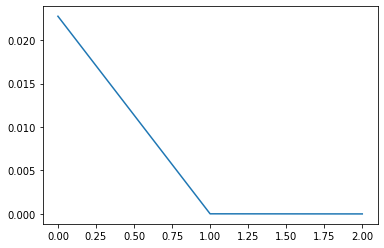

In [199]:
test(f3, 'Powell')

iteration avg: 11.4
Number of evaluations of Function avg: [556, 444, 536, 544, 564]
Number of evaluations of Jacobian avg: [136, 108, 131, 133, 138]
Resutls avg: [-5.65824170e-09 -6.66533829e-09]
Time avg: 14385323.2


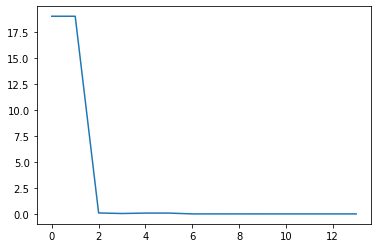

In [200]:
test(f3, 'BFGS')

## f4

iteration avg: 66.4
Number of evaluations of Function avg: [135, 101, 121, 139, 126]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [0.00019776 0.0001808 ]
Time avg: 12495698.6


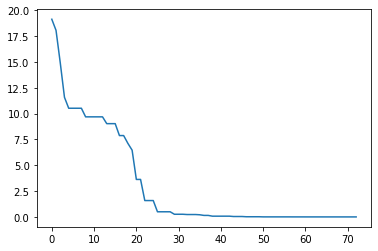

In [201]:
test(f4, 'Nelder-Mead')

iteration avg: 3.4
Number of evaluations of Function avg: [153, 101, 101, 101, 101]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [0.00019093 0.00019093]
Time avg: 8076205.6


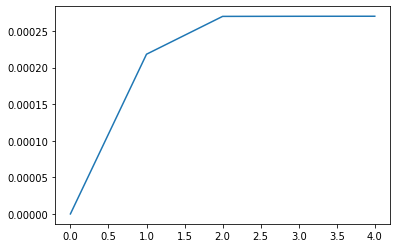

In [202]:
test(f4, 'Powell')

iteration avg: 15.8
Number of evaluations of Function avg: [144, 60, 60, 144, 64]
Number of evaluations of Jacobian avg: [36, 15, 15, 36, 16]
Resutls avg: [0.0001911  0.00019117]
Time avg: 5390975.4


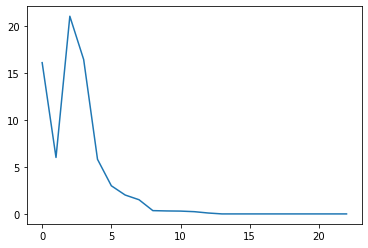

In [203]:
test(f4, 'BFGS')

## f5

iteration avg: 66.8
Number of evaluations of Function avg: [138, 125, 116, 125, 124]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [-1.13540883e-08 -2.32427218e-05]
Time avg: 5782472.8


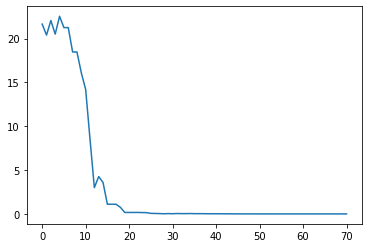

In [204]:
test(f5, 'Nelder-Mead')

iteration avg: 9.2
Number of evaluations of Function avg: [147, 147, 145, 867, 169]
Number of evaluations of Jacobian avg: [0, 0, 0, 0, 0]
Resutls avg: [ 1.00906872e-12 -4.82668910e-07]
Time avg: 4729768.2


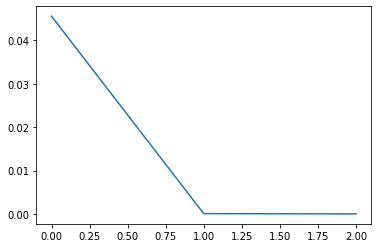

In [205]:
test(f5, 'Powell')

iteration avg: 23.6
Number of evaluations of Function avg: [100, 92, 88, 108, 104]
Number of evaluations of Jacobian avg: [25, 23, 22, 27, 26]
Resutls avg: [-8.11256671e-09  1.16691571e-02]
Time avg: 4495176.2


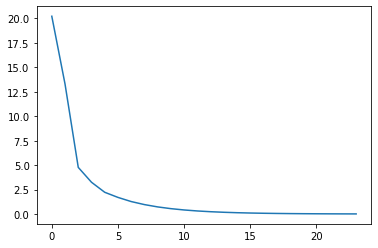

In [206]:
test(f5, 'BFGS')